Добавление сэмпла 'result.json' и преобразование его в list

In [1]:
from json import load
class News:
    def __init__(self):
        self.url = ""
        self.title = ""
        self.text = ""
        self.autor = []
        self.img = []
        self.urls = []
        self.dateday = ""
        self.tags = []
news = list()
with open('result.json', 'r', encoding="utf-8") as json_file:
    data = load(json_file)
    data_count = len(data)
    for i in range(data_count):
        inp = News()
        inp.url = data[i]['url']
        inp.title = data[i]['title']
        inp.text = data[i]['text']
        inp.autor = data[i]['autor']
        inp.img = data[i]['img']
        inp.urls = data[i]['urls']
        inp.dateday = data[i]['dateday']
        inp.tags = data[i]['tags']
        news.append(inp)

Задание 1: Построить word cloud по текстам статей.

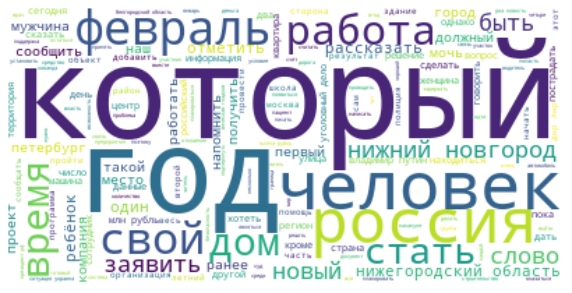

In [2]:
import pymorphy2
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from string import punctuation
from nltk import word_tokenize, Text
from nltk.probability import FreqDist
from nltk.corpus import stopwords
morph = pymorphy2.MorphAnalyzer()
all_str = ""
for x in news:
    all_str += x.text
all_str = all_str.lower()
spec_chars = punctuation + '\n\xa0«»\t—…0123456789–№'
all_str = "".join([ch for ch in all_str if ch not in spec_chars])
words = stopwords.words("russian")
words.extend(["это","также","изза", "около","тех","м","ещё","её","два"])
for word in words:
    all_str= all_str.replace(" "+ word + " ", " ")
while "  " in all_str:
    all_str= all_str.replace("  ", " ")
str_tok = word_tokenize(all_str, language="russian")
for i in range(len(str_tok)):
    str_tok[i] = morph.parse(str_tok[i])[0].normal_form
all_str = Text(str_tok)
text_raw = " ".join(all_str)
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(text_raw)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Задание 2: Иногда в тексте статьи есть ссылки на предыдущие публикации по данной теме, в них тоже могут быть такие ссылки и т.д. Построить все такие цепочки, выделить топ-N самых длинных.

In [3]:
import operator
def Srch(key, dict, news):
    ch = dict.get(key.url)
    if ch != None:
        return ch
    if len(key.urls) == 0:
        return 0
    maxtemp = 0
    flag = False
    for i in key.urls:
        if i == key.url:
            continue
        temp = 0
        ch = dict.get(i)
        if ch != None:
            temp = ch
        else:
            for x in news:
                if(x.url == i):
                    dict[x.url] = Srch(x, dict, news)
                    temp = dict[x.url]
                    flag = True
        maxtemp = max(temp, maxtemp)
    if not flag:
        return 0
    else:
        return maxtemp + 1
dict = {}
for x in news:
    dict[x.url] = Srch(x, dict, news)
sort_tup = sorted(dict.items(), key=operator.itemgetter(1), reverse=True)
print("Введите N:")
N = int(input())
for i in range(N):
    print(str(i+1) + ') ' + sort_tup[i][0] + ' - ' +
          str(sort_tup[i][1]) + ' переходов')



Введите N:
10
1) https://www.fontanka.ru/2022/02/27/70474307/ - 8 переходов
2) https://www.fontanka.ru/2022/02/27/70474184/ - 7 переходов
3) https://www.fontanka.ru/2022/02/27/70474160/ - 6 переходов
4) https://www.fontanka.ru/2022/02/27/70474007/ - 6 переходов
5) https://www.fontanka.ru/2022/02/09/70434143/ - 5 переходов
6) https://www.fontanka.ru/2022/02/14/70443845/ - 5 переходов
7) https://www.fontanka.ru/2022/02/22/70463447/ - 5 переходов
8) https://www.fontanka.ru/2022/02/26/70473545/ - 5 переходов
9) https://www.fontanka.ru/2022/02/26/70473176/ - 5 переходов
10) https://www.fontanka.ru/2022/02/08/70431758/ - 5 переходов
